In [11]:
import keras as ks
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.preprocessing.image import load_img, img_to_array

In [13]:
model = ks.models.load_model("models\\plate_detection.h5")
print("success")

success


In [50]:
path = ("data\\images\\Cars54.png")
image = load_img(path)
image = np.array(image,dtype=np.uint8) #0-255
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0

In [60]:
h,w,d = image.shape
print(h)
print(w)

300
400


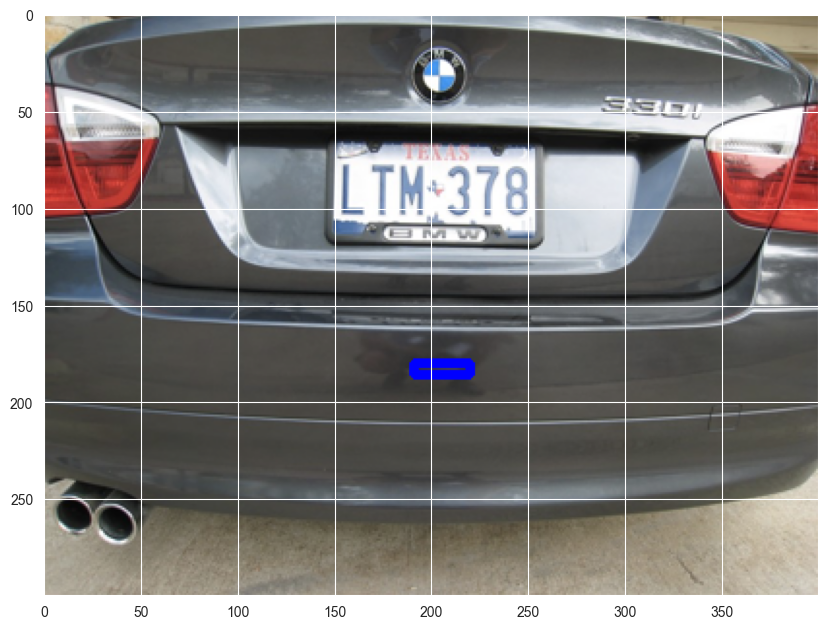

In [61]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [62]:
image_arr_224.shape

(224, 224, 3)

In [63]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [64]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 182ms/step


array([[0.4778431 , 0.55209404, 0.6220786 , 0.6028776 ]], dtype=float32)

Denormalize output

In [65]:
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[191.13724232, 220.83761692, 186.62357926, 180.86328506]])

In [67]:
coords = coords.astype(np.int32)
coords

array([[191, 220, 186, 180]])

(191, 186) (220, 180)


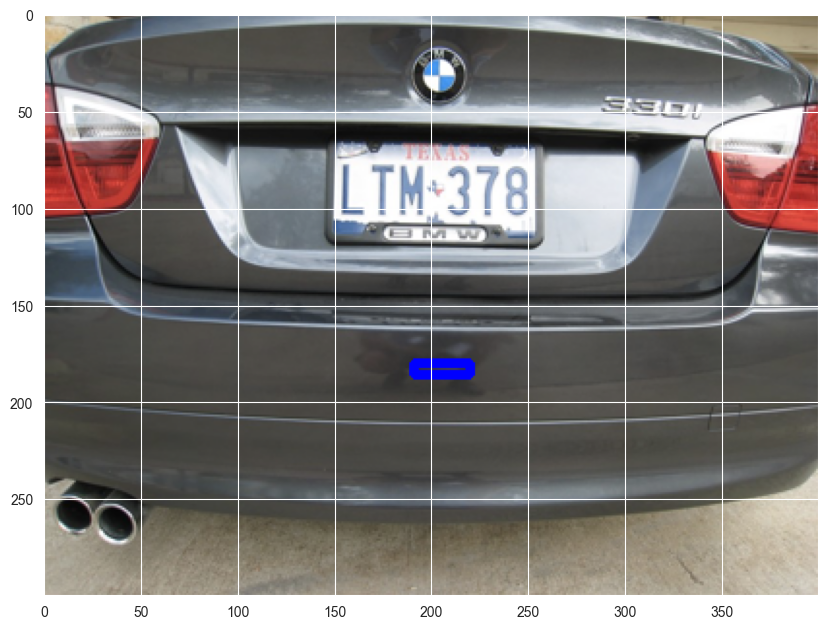

In [68]:
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,0,255),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()